### Time Series Project Scratchpad

In [11]:
# imports
import pandas as pd
import requests
import acquire
import prepare
import project
import matplotlib.pyplot as plt
import seaborn as sns
from time import strftime

### Assignment
The goal of this mini-project is to practice what you have learned at each stage of the pipeline throughout the time series module. You will use the earth surface temperature data offered by Berkeley Earth through Kaggle.com. You will select one location, could be a city or a state or something relatively similar in size and analyze the patterns in temperature over time. You will then model those patterns to forecast temperature into the future (how far is up to you, but should be something meaningful).



Use the data from this kaggle competition: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

There will not be a presentation, but be sure and have a final notebook that someone could quickly review to see what you found. Don't forget the planning stage! Practice all the techniques and best practices you have been taught and have been using in each module thus far. 

Create a notebook within your existing time series exercises repository.

Submit a link to your final notebook.

### Project Planning
1. Pick a city / state from data set
2. Acquire the data
3. Explore the unclean data to determine Data Prep Need To
4. Prepare / clean / tidy the data for splitting / exploration
5. Pick a reasonable splitting point and split into train / test datasets
6. Explore the train dataset
    - Look at Daily / Weekly / Monthly / Quarterly / Yearly trends / cycles
    - Visualize changes over time
    - Visualize a seasonal cycle
    - Show lag plots / Auto-correlation / Decomposition / Mas
7. Build at least 3 Models (Simple Average, Moving Average, Holt's Linear Trend, Change timeframe based-on)
8. Evaluate Models, adjust hyperparameters and pick best model to evaluate on test
9. Conclusions / Takeaways / Next Steps

### Pick a city and bring in the raw data...

In [2]:
# Let's go with Raleigh, NC
# df = pd.read_csv('GlobalLandTemperaturesByCity.csv.zip')

In [3]:
# Reset the database so I only have info from Raleigh, NC
# df = df[df['City']=='Raleigh']
# df.head()

In [4]:
# What are we looking at?
# df.info()

#### Initial Prep To Do:
- Convert 'Date' to DateTime
- Reset Index to 'Date'
- Drop Null Values
- Columns to Drop 'City', 'Country', 'Latitude', 'Longitude'

In [5]:
# df = prepare.to_datetime(df, 'dt')

In [6]:
df = project.get_raleigh()

In [7]:
df = project.initial_prep(df, 'dt')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3119 entries, 1743-11-01 to 2013-09-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_temp              3119 non-null   float64
 1   avg_temp_uncertainty  3119 non-null   float64
dtypes: float64(2)
memory usage: 73.1 KB


In [9]:
df.head()

,avg_temp,avg_temp_uncertainty
dt,,
1743-11-01,7.810,2.072
1744-04-01,15.871,2.066
1744-05-01,19.527,1.850
1744-06-01,24.125,1.782
1744-07-01,25.125,1.627


In [10]:
df.describe()

,avg_temp,avg_temp_uncertainty
count,3119.000000,3119.000000
mean,14.418861,1.362983
std,7.961493,1.369085
min,-2.690000,0.062000
25%,7.301500,0.295000
50%,14.292000,0.697000
75%,22.310500,2.192000
max,31.475000,8.730000


In [19]:
df.index.min(), df.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [20]:
df.index.nunique()

3119

In [23]:
df.head(2495)

,avg_temp,avg_temp_uncertainty
dt,,
1743-11-01,7.810,2.072
1744-04-01,15.871,2.066
1744-05-01,19.527,1.850
1744-06-01,24.125,1.782
1744-07-01,25.125,1.627
...,...,...
1961-05-01,17.535,0.321
1961-06-01,22.390,0.246
1961-07-01,24.946,0.203


In [24]:
# Let's split into train and test
# we will use the 80-20 method (roughly)

train = df.loc[:'1961']
test = df.loc['1962':]

In [26]:
# did I lose any data?
train.shape, test.shape

((2498, 2), (621, 2))

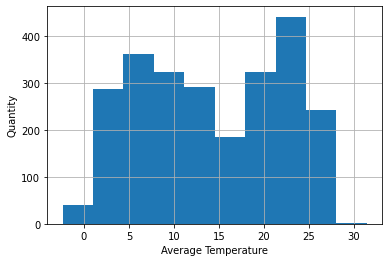

In [27]:
# Distribution of Average Temperature
train.avg_temp.hist()
plt.xlabel('Average Temperature')
plt.ylabel('Quantity')
plt.show()

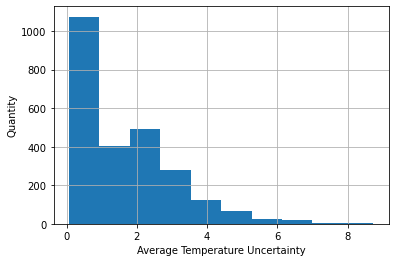

In [28]:
# Distribution of Temperature Uncertainty
train.avg_temp_uncertainty.hist()
plt.xlabel('Average Temperature Uncertainty')
plt.ylabel('Quantity')
plt.show()